Title: k-Means, PCA, and Tree VQ
Author: Thomas Breuel
Institution: UniKL

In [1]:
import random as pyrand
import tables
matplotlib.rc("image",cmap="gray")

# Clustering Shapes

In [2]:
hdf = tables.openFile("leaves.h5","r")
nimages = len(hdf.root.icons)
images = hdf.root.icons[:,:,:]/256.0
data = images.reshape(nimages,-1)

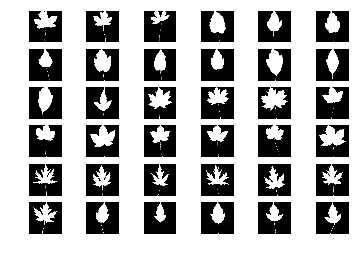

In [3]:
for i in range(36):
    subplot(6,6,i+1); imshow(images[i]); axis("off")

In [4]:
from sklearn.cluster import KMeans,MiniBatchKMeans
km = MiniBatchKMeans(n_clusters=36)
km.fit(data)
assignments = km.predict(data)
nearest = [[i for i,j in enumerate(assignments) if j==c] for c in range(36)]
good = [l for l in nearest if len(l)>3]

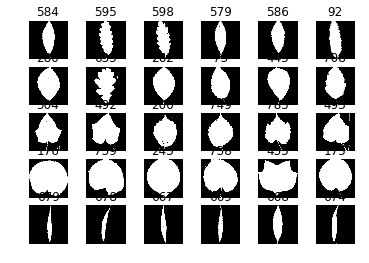

In [5]:
for i,l in enumerate(good[:5]):
    for j,k in enumerate(pyrand.sample(l,min(6,len(l)))):
        subplot(5,6,i*6+j+1)
        imshow(hdf.root.icons[k])
        title("%d"%(k,))
        axis("off")

# Combining PCA and $k$-means

In [6]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=10)
pca.fit(data)
lo = pca.transform(data)
hi = pca.inverse_transform(lo)

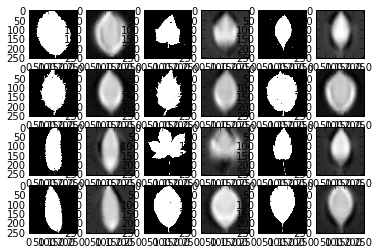

In [7]:
for i,j in enumerate(pyrand.sample(range(len(images)),12)):
    subplot(4,6,2*i+1); imshow(images[j])
    subplot(4,6,2*i+2); imshow(hi[j].reshape(256,256))

In [8]:
from sklearn.cluster import KMeans,MiniBatchKMeans
km = MiniBatchKMeans(n_clusters=36)
km.fit(lo)
assignments = km.predict(lo)
nearest = [[i for i,j in enumerate(assignments) if j==c] for c in range(36)]
good = [l for l in nearest if len(l)>3]

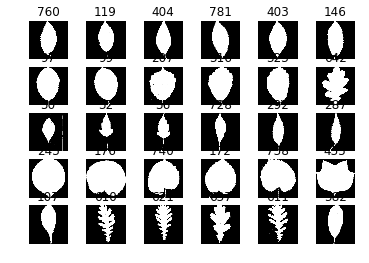

In [9]:
for i,l in enumerate(good[:5]):
    for j,k in enumerate(pyrand.sample(l,min(6,len(l)))):
        subplot(5,6,i*6+j+1)
        imshow(images[k])
        title("%d"%(k,))
        axis("off")

# Hierarchical and Tree VQ

In [10]:
km = MiniBatchKMeans(n_clusters=9)
km.fit(lo)
assignments = km.predict(lo)
nearest = [[i for i,j in enumerate(assignments) if j==c] for c in range(9)]

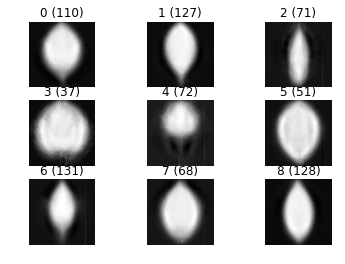

In [11]:
for i,c in enumerate(km.cluster_centers_):
    im = pca.inverse_transform(c)
    subplot(3,3,i+1); axis("off"); imshow(im.reshape(256,256))
    title("%d (%d)"%(i,len(nearest[i])))

In [16]:
data0 = [data[i] for i in nearest[0]] # note data instead of lo
print len(data0)
km0 = MiniBatchKMeans(n_clusters=9)
km0.fit(data0)
assignments0 = km0.predict(data0)
nearest0 = [[i for i,j in enumerate(assignments0) if j==c] for c in range(9)]

110


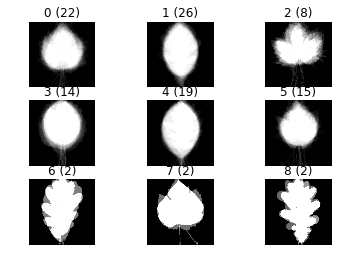

In [17]:
for i,c in enumerate(km0.cluster_centers_):
    subplot(3,3,i+1); axis("off"); imshow(c.reshape(256,256))
    title("%d (%d)"%(i,len(nearest0[i])))

Hierarchical Tree VQ:

- we perform VQ in several stages
- a first, top-level VQ
- then we split the data based on the top-level assignments
- then we repeat the VQ for each split
- this can be continued recursively (tree VQ)
- if we use different resolutions or number of PCA components at each level, we are using a hierarchical VQ

Hierarchical tree VQ is a good way of clustering very large data sets.